In [8]:
import pandas as pd

data = pd.Series([1,2,3],index =['a','b','c'])

print(data)

a    1
b    2
c    3
dtype: int64


In [12]:
new_index = ['a','b']
reindexd_series = data.reindex(new_index)

print(reindexd_series)

a    1
b    2
dtype: int64


In [13]:
new_index = ['a','b','c','d','e','f']
reindexd_series = reindexd_series.reindex(new_index)

print(reindexd_series)

a    1.0
b    2.0
c    NaN
d    NaN
e    NaN
f    NaN
dtype: float64


In [6]:
data = {'A':[1,2,3], 'B':[4,5,6]}
df = pd.DataFrame(data, index = ['a','b','c'])

print(df)

   A  B
a  1  4
b  2  5
c  3  6


In [7]:
new_index = ['a','b','c','d']
new_columns = ['A', 'B','C']
reindexed_df = df.reindex(index = new_index, columns = new_columns)

print(reindexed_df)

     A    B   C
a  1.0  4.0 NaN
b  2.0  5.0 NaN
c  3.0  6.0 NaN
d  NaN  NaN NaN


## Hypothetical Dataset
Suppose we have a dataset of sales data from different stores, including the number of customers and total sales. The distribution of total sales might be highly skewed, which is common in sales data.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a hypothetical dataset
np.random.seed(0)
data = {
    'Store': [f'Store_{i}' for i in range(1, 101)],
    'Customers': np.random.poisson(lam=30, size=100),
    'Total_Sales': np.random.gamma(shape=2, scale=10000, size=100)
}
df = pd.DataFrame(data)

# Viewing the first few rows of the dataframe
print(df.head())


     Store  Customers   Total_Sales
0  Store_1         31   4927.592970
1  Store_2         32  20357.462909
2  Store_3         29  24375.973587
3  Store_4         29  14548.658574
4  Store_5         45  40560.454528


This will generate a DataFrame with 100 entries of stores, their customer counts, and total sales.

### Analysis Without Log Transformation
Let's first analyze the relationship between the number of customers and total sales without any transformation.

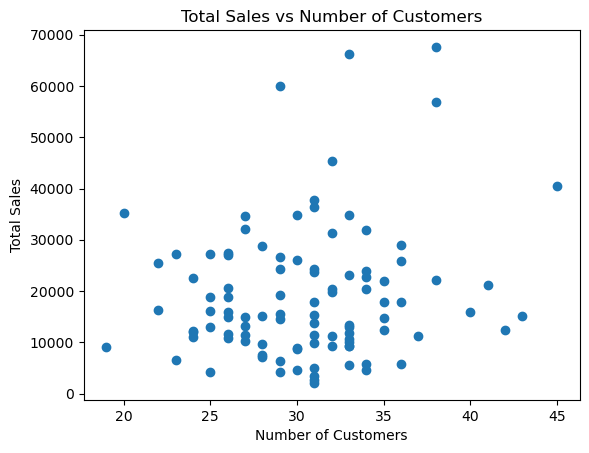

In [7]:
plt.scatter(df['Customers'], df['Total_Sales'])
plt.xlabel('Number of Customers')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Number of Customers')
plt.show()


This plot might show a skewed relationship due to the wide range of the 'Total_Sales' values.

### Analysis With Log Transformation
Now, let's apply a logarithmic transformation to 'Total_Sales' to normalize its distribution.

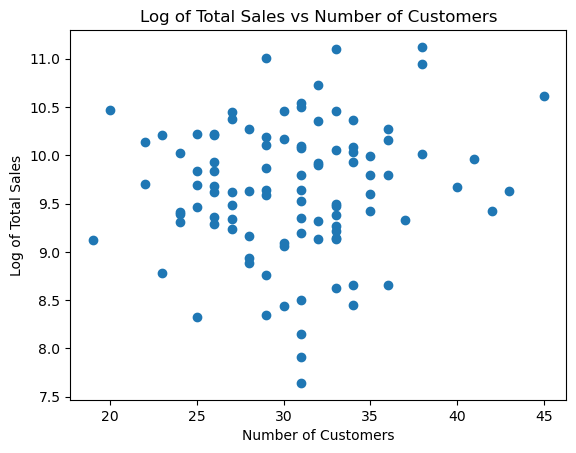

In [8]:
# Applying log transformation
df['Log_Total_Sales'] = np.log(df['Total_Sales'] + 1) # Adding 1 to avoid log(0)

# Plotting the transformed data
plt.scatter(df['Customers'], df['Log_Total_Sales'])
plt.xlabel('Number of Customers')
plt.ylabel('Log of Total Sales')
plt.title('Log of Total Sales vs Number of Customers')
plt.show()


### Observations
After applying the log transformation, the relationship between the number of customers and total sales may appear more linear. This transformation can be particularly beneficial for:

- Linear Regression Models: When fitting a linear model, a more linear relationship makes the model more effective.
- Handling Outliers: Log transformation reduces the impact of outliers, which are common in skewed distributions.
- Interpretability: It can sometimes make patterns more visible and data relationships easier to interpret.

### Important Notes

- Always add a small constant (like 1) when applying log transformation to ensure you don't take the log of zero.
- Not all data or relationships benefit from log transformation; it's essential to understand your data and the context.
- After analysis, consider transforming your data back (using exponential in the case of log transformation) to interpret the results in their original scale.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating the dataset
np.random.seed(0)
x = np.arange(1, 101)
y = np.exp(0.05 * x) + np.random.normal(0, 25, 100)

df = pd.DataFrame({'X': x, 'Y': y})

# Viewing the first few rows
print(df.head())


   X          Y
0  1  45.152580
1  2  11.109101
2  3  25.630284
3  4  57.243733
4  5  47.972975


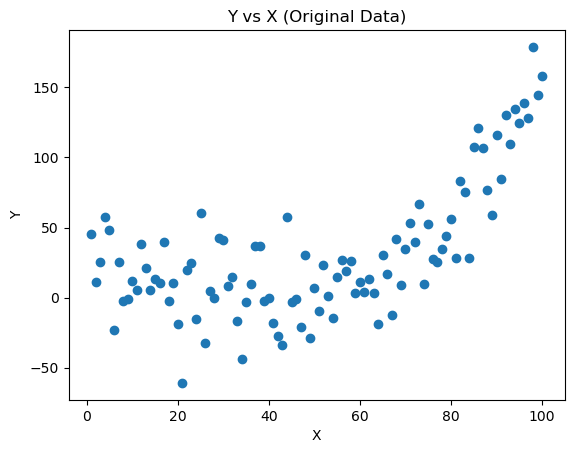

In [10]:
plt.scatter(df['X'], df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y vs X (Original Data)')
plt.show()


/Users/tutu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


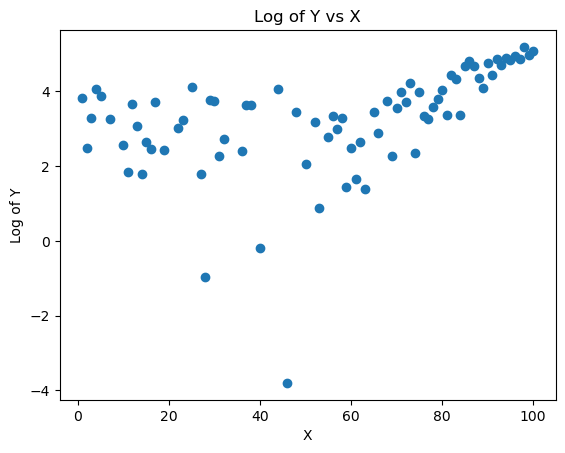

In [11]:
# Applying log transformation to 'Y'
df['Log_Y'] = np.log(df['Y'] + 1)  # Adding 1 to avoid log(0)

plt.scatter(df['X'], df['Log_Y'])
plt.xlabel('X')
plt.ylabel('Log of Y')
plt.title('Log of Y vs X')
plt.show()
